In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

import_data_url = "/Tweets.csv"
sentiment_tweets = pd.read_csv(import_data_url)
sentiment_tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


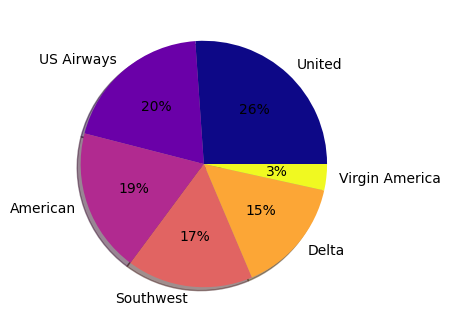

In [ ]:
plt.figure(figsize=(6,4))
sentiment_tweets.airline.value_counts().plot(kind='pie', label='',cmap='plasma',shadow=True, autopct='%1.0f%%')
plt.show()

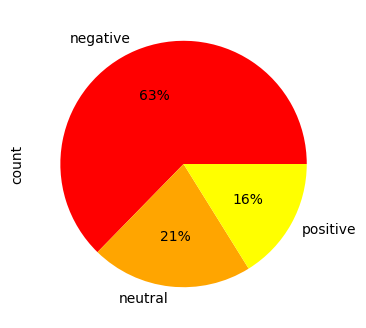

In [ ]:
plt.figure(figsize=(6,4))
sentiment_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "orange", "yellow"])
plt.show()

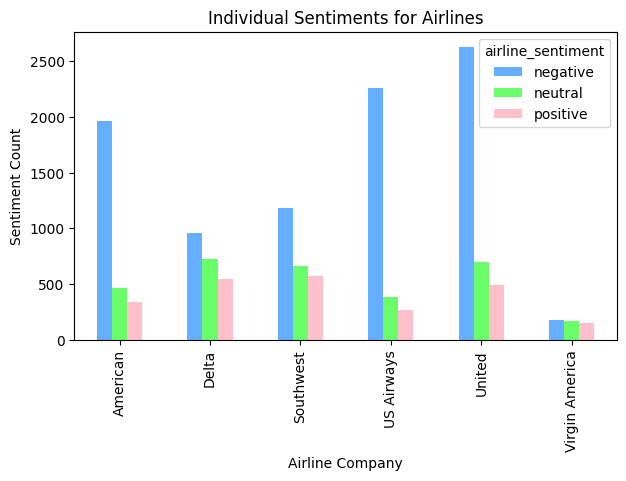

In [ ]:
airline_grouped_sentiment = sentiment_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_grouped_sentiment.plot(figsize=(7,4), kind='bar', title='Individual Sentiments for Airlines', xlabel='Airline Company', ylabel='Sentiment Count',color=['#64afff','#69fe6a','pink'])
plt.show()

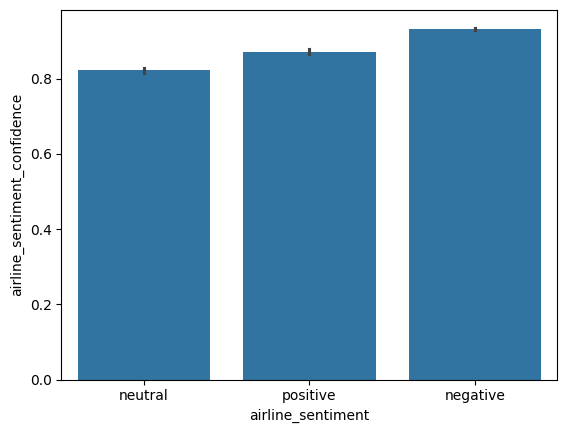

In [ ]:
import seaborn as sns
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence', data=sentiment_tweets)
plt.show()

In [ ]:
feature_set = sentiment_tweets.iloc[:, 10].values
label_set = sentiment_tweets.iloc[:, 1].values
cleaned_feature_set = list()
for input_phrase in range(0, len(feature_set)):
    # 1. Removing all the special characters (*,etc.) and single characters (a,an,etc.)
    clean_feature = re.sub(r'\W', ' ', str(feature_set[input_phrase]))
    clean_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', clean_feature)
    clean_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', clean_feature)
    # 2. Convert the entire phrase to lower cases
    clean_feature = clean_feature.lower()
    cleaned_feature_set.append(clean_feature)

In [ ]:
import nltk
nltk.download("stopwords")
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords # Import stopwords from nltk.corpus
from sklearn.feature_extraction.text import TfidfVectorizer

input_vector = TfidfVectorizer (max_features=3000, min_df=6, max_df=0.8, stop_words=stopwords.words('english'))
cleaned_feature_set = input_vector.fit_transform(cleaned_feature_set).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_feature_set, label_set, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Random Forest Classification
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_classifier_score = rf_classifier.score(X_train, y_train)
# Support Vector Machine Linear Classification
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)
svc_classifier_score = svc_classifier.score(X_train, y_train)
# Logistic Regression
lr_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
lr_classifier_score = lr_classifier.score(X_train, y_train)
# K-Nearest Neighbors Classification
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_classifier_score = knn_classifier.score(X_train, y_train)

# Comparision of individual accuracy scores
accuracy_scores = []
Used_ML_Models = ['Random Forest Classification','Support Vector Machine Classification','Logistic Regression',
                   'KNN Classification']
accuracy_scores.append(rf_classifier_score)
accuracy_scores.append(svc_classifier_score)
accuracy_scores.append(lr_classifier_score)
accuracy_scores.append(knn_classifier_score)
score_comparisons = pd.DataFrame(Used_ML_Models, columns = ['Classifiers'])
score_comparisons['Accuracy on Training Data'] = accuracy_scores
score_comparisons

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,Classifiers,Accuracy on Training Data
0,Random Forest Classification,0.992965
1,Support Vector Machine Classification,0.859808
2,Logistic Regression,0.820657
3,KNN Classification,0.797002


In [ ]:
# We see that the Random Forest Classifier performs the best
# Final prediction using the best-case algorithm from the above table
final_pred = rf_classifier.predict(X_test)
# Accuracy score of the final prediction
print(accuracy_score(y_test, final_pred))

0.7667632450331126
